#The Relationship Between Different Player's Stats And Their Value
* Josue Ramirez Antonio
* Ashley Lopez
* Sandra Castro-Valadez
* Alondra Castro-Valadez


# Abstract
Our project aims to discern the correlation between various statistics of professional soccer players and their value when a team considers acquiring them. To achieve this, we've gathered data from a [Football API](https://rapidapi.com/api-sports/api/api-football/) to extract specific player information. Our dataset includes players recognized for their [significant](https://bleacherreport.com/articles/751526-world-football-transfers-top-25-most-important-transfers-of-all-time) [good](https://www.90min.com/posts/best-transfers-of-2021-ranked) [transfers](https://www.90min.com/posts/the-best-signings-of-2020-ranked) or [significant](https://www.90min.com/posts/transfers-worst-signings-football-history-hazard-coutinho-dembele) [bad transfers](https://www.espn.com/soccer/story/_/id/37583059/ranking-50-worst-premier-league-transfers-all), serving as examples for comparing player performance post-transfer. Using this data, we employ a logistic regression model to predict whether a transfer is labeled as "bad" or "good" based on selected statistics. Our most effective model attains an 86% accuracy when trained with the top four correlated features with our target variable (bad/good transfer). Refer to the "Result/Machine Learning" section for comprehensive details on our classification model's performance.

# Introduction
For professional soccer players, their profile statistics are determined by their game performances, carrying significant weight in assessing the player's value. Each player receives ratings based on their in-game performance, contributing to a public profile that tracks these ratings. For instance, the count of a player's season game appearances reflects reliability and value to their team. Goals total is another crucial statistic, influenced by position and overall goal count, indicating a player's skill and utility for the team. Players understand the importance of these statistics, striving for optimal ratings, especially when considering a move to another team. However, determining which statistic impacts their transfer value the most remains uncertain. Analyzing professional players' performance before and after a transfer enables us to identify the key statistics that significantly contribute to a player's value.
We collected data from the free plan of the Football API free plan, obtaining pertinent statistical information from players' profiles to integrate into our model. This website offers updated data for any season a player has participated in at a specific club. This information proves valuable for both current clubs evaluating player performance for retention and other clubs assessing potential purchases. Our framework centers on analyzing 20 successful transfers and 20 unsuccessful transfers, aiming to address two crucial questions:



Can we determine what specific stats clubs should be looking at when buying a player?
Can we provide a probability for a player on whether the player would be likely to be successful or not?
Utilizing a Logistic Regression model, a machine learning algorithm, we will analyze a dataframe comprising data from the season preceding and following a player's transfer. This analysis aims to identify the key statistics influencing whether a transfer is deemed 'good' or 'bad.' Additionally, the predicted probabilities generated by our model will provide an approximate likelihood of transfer success based on a player's statistical profile.


- Can we determine what specific stats clubs should be looking at when buying a player?
- Can we provide a probability for a player on whether the player will be successful or not?

By running a Logistic Regression model, a type of machine learning algorithm, on a dataframe which will include data from the season before and after a transfer of a player, we can determine what statistics matter the most when determining whether a transfer will be "good" or "bad." Moreover, we will use the predicted probabilities from our model to get a rough probability of transfer success based on a player's stats.






# Data Description
Our project involves managing two sets of data branches: one for all players of interest, featuring labels indicating the success of their transfers, and another tracking the changes in statistics for these players (new season stats minus previous season stats).
In both data branches, we interact with the Football API (API-Football), supplying the player's name, the team they transferred from, the team they transferred to, the year before the transfer, the year after the transfer, and the success status of the transfer (manually added based on domain knowledge). This data collection spans the last 9 years of transfers. Following this, we construct a dataframe that thoroughly represents all the players we queried, ensuring transparency about the dataset in use. Subsequently, we pass this dataframe through a function that uses the API to obtain information for each player, returning their respective statistics. API-Football provides a total of 32 stats for each player. The statistical data frame is then used to create another dataframe that captures the differences in statistics before and after the transfer.
We can then look at each stat/feature in the change in stats data frame to get a meaningful insight of that particular stat, and how it seems to affect a particular type of transfer. The change in stats dataframe is then cleaned to remove any rows that have no information, and to remove rows that have no information for the particular top 10 features we picked.


| isGood_transfer | dribbles.attempts | goals.total | games.lineups | games.minutes | goals.assists | passes.key | dribbles.success | games.appearances | shots.on | shots.total |
|-----------------|-------------------|-------------|---------------|---------------|---------------|------------|------------------|-------------------|----------|-------------|
| True            | 37.0              | -5.0        | 5.0           | 470.0         | -4.0          | 6.0        | 20.0             | 4.0               | -12.0    | -2.0        |

The snippet above shows the top 10 feautures that we picked through generating a heatmap plot showing the top 10 stats correlated with our target variable ("isGood_transfer"). For this example, we can see player 0 is labeled as a good transfer, he had 37 more dribble attempts than his previous season, 5 less (notice value is negative) goals than previous season, 5 more game lineups, i.e., started matches, 470 more minutes played than previous season, 4 less goal assists, 6 more key passes, 20 more succesful dribbles, 4 more game appearances, 12 less shots on target, and 2 less total shots.

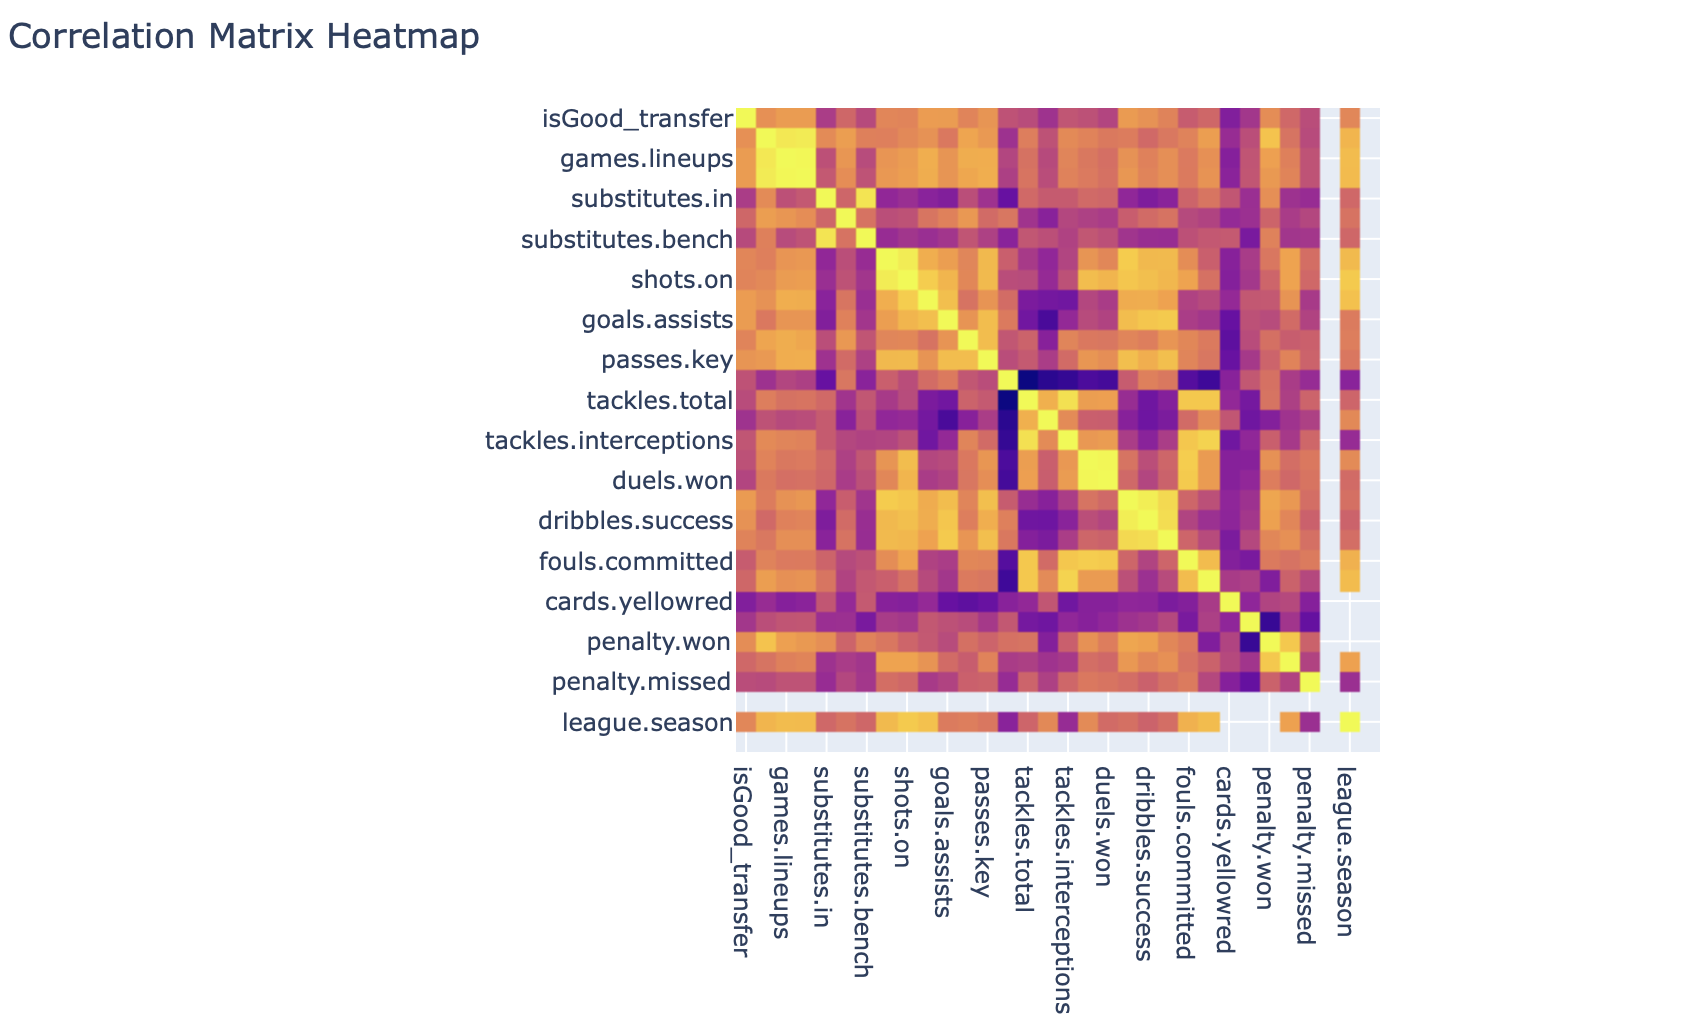

The plot above shows the heatmap that helped us pick 10 features out of the original 32 the API retrieves. We picked 10 based on a combination of domain knowledge and the most correlated.
Additionally, we picked “goals.total” and “games.minutes” to create a scatter plot in order to visually inspect potential relationships between these two variables.

# Pipeline Overview
###Football API Retrieval

In [ ]:
# Import packages
import requests
import pandas as pd
import json
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import pickle
import seaborn as sns

# Adding all of the id's for the teams we are using
# API stores all team id's in their website's dashboard which we could technically scrape,
# but in the best interest of time, we're currently storing these manually.

teams_ids = {'Lech Poznan' : 347, 'Borussia Dortmund' : 165,
            'Fluminense' : 124, 'Real Madrid' : 541, 'Barcelona': 529,
            'Cruz Azul' : 2295,'Feyenoord': 209, 'Manchester United': 33,
            'Monaco' : 91, 'PSG' : 85, 'Tottenham' : 47,
            'Arsenal' : 42, 'Santos': 128, 'Atletico Madrid': 530,
            'Chelsea' : 49, 'Liverpool' : 40, 'Inter Milan':  505,
            'Boca Juniors': 451 , 'Shanghai Shenhua': 833, 'Borussia Dortmund': 165,
            'Athletic Club': 531 , 'Leicester': 46, 'Juventus': 496,
            'AC Milan': 489 , 'Valencia': 532, 'Lazio': 487,
            'Newcastle': 34 , 'Eintracht Frankfurt': 169,
           'Ajax': 425, 'West Ham': 48, 'Sporting CP': 228, 'Eintracht Frankfurt': 169,
           'Roma': 497, 'Bayern Munich': 157, 'Manchester City': 50, 'Everton': 45, 'South Hampton': 41,
            "Bordeaux" : 78, "Newcastle United" :34, 'Birmingham' : 54, 'Norwich': 71, 'Aston Villa': 66, 'Lille': 79,
            "Benfica": 211, "Nottingham Forest":65, 'LA Galaxy': 1605, 'Crystal Palace': 52, 'Ituano' : 7779, 'Wolves':39
            }

def get_team_id(team_name):
    """ Get team id from team name found in our dict of team ids
        Args: team_dict (dict of teams), team_name (string)
    """
    id = teams_ids.get(team_name)
    return id

In [ ]:
def get_team_season_players(team_id, season):
    """ Extract json with all teams' players info for given team and season
        Args: team_id (int), season (YYYY-YYYY)
    """
    url = f"https://api-football-v1.p.rapidapi.com/v2/players/squad/{team_id}/{season}"
    headers = {
    'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
    'x-rapidapi-key': 'cb394d9372mshfc40fe51e5602b8p1a52d4jsn29044e42587b'}
    response = requests.request("GET", url, headers=headers)
    return response.json()

In [ ]:
def get_players_dict(team_id, season):
    """ Get dict of all teams' players for given team and season where
        (key, value) -> (player_name, (player_id, p_firstname, p_lastname))
        Args: team_id (int), season (YYYY-YYYY)
    """
    players_dict = {}
    json = get_team_season_players(team_id, season)['api']['players']
    for i in range(len(json)):
        players_dict[json[i]['player_name']] = (json[i]['player_id'], json[i]['firstname'], json[i]['lastname'])
    return players_dict

In [ ]:
def get_player_id(player_name, player_team, season):
    """ Retrieve player id from players dict
        Args: player_name (string), player_team (string), year (YYYY-YYYY)
    """
    team_id = get_team_id(player_team)

    #from the id let's get the dict of all the players
    players_dict = get_players_dict(team_id, season)

    # id that will be returned if not found
    id = 00000

    for key in players_dict:
        if player_name in key:
            print('FOUND')
            value = players_dict[key]
            id = value[0]
    return id

In [ ]:
def id_player_info(id):
    """ Retrieve player's info as json from their id
        Args: id (int)
    """
    url = f"https://api-football-v1.p.rapidapi.com/v2/players/player/{id}"
    headers = {
        'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
        'x-rapidapi-key': "cb394d9372mshfc40fe51e5602b8p1a52d4jsn29044e42587b"}
    response = requests.request("GET", url, headers=headers)
    return response.json()

In [ ]:
def id_player_info(id):
    """ Retrieve player's info as json from their id
        Args: id (int)
    """
    url = f"https://api-football-v1.p.rapidapi.com/v2/players/player/{id}"
    headers = {
        'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
        'x-rapidapi-key': "cb394d9372mshfc40fe51e5602b8p1a52d4jsn29044e42587b"}
    response = requests.request("GET", url, headers=headers)
    return response.json()

In [ ]:
players_list = []
player_id_list = []
team_to_list = []
team_to_id_list = []
team_from_list = []
team_from_id_list = []
year_before_list = []
year_after_list = []
isgood_transfer_list = []

def produceData(player_name, team_from, team_to, year_before, year_after, isgood_transfer):
    """ Populate several lists with player stats to then be used as input for data df
        Args: player_name, team_from, team_to -- all strings,
              year_before, year_after -- all 'YYYY', isgood_transfer (boolean)
    """
    # Find team ids and season
    team_1id = get_team_id(team_from)
    team_2id = get_team_id(team_to)
    season =  f'{year_before}-{year_before + 1}'

    # Get player's data as json
    player_id = get_player_id(player_name, team_from, season)
    player_json = id_player_info(player_id)
    player_name = player_json['api']['players'][1]['player_name']

    # Append player data to corresponding list
    players_list.append(player_name)
    player_id_list.append(player_id)
    team_to_list.append(team_to)
    team_from_list.append(team_from)
    year_before_list.append(year_before)
    year_after_list.append(year_after)
    team_from_id_list.append(team_1id)
    team_to_id_list.append(team_2id)
    isgood_transfer_list.append(isgood_transfer)

In [ ]:
# Get good transfers from here: https://www.90min.com/posts/best-transfers-of-2021-ranked
# Get bad transfers from here: https://www.90min.com/posts/transfers-worst-signings-football-history-hazard-coutinho-dembele

players_dict = {'player_name': players_list, 'player_id' : player_id_list, 'team_from': team_from_list ,
             'team_to': team_to_list, 'team_from_id': team_from_id_list, 'team_to_id': team_to_id_list,
             'year_before': year_before_list, 'year_after': year_after_list, 'isgood_transfer': isgood_transfer_list}

# Generate data for good transfers:
"""
produceData('Ronaldo', 'Real Madrid', 'Juventus', 2017,2019, True)
produceData('Bale', 'Tottenham', 'Real Madrid', 2012,2014, True)  # R
produceData('K. Mbappé', 'Monaco', 'PSG', 2016, 2018, True)
produceData('S. Giménez', 'Cruz Azul', 'Feyenoord', 2021, 2023, True)
produceData('Haaland', 'Borussia Dortmund', 'Manchester City', 2021, 2023, True)
produceData('S. Haller', 'West Ham', 'Ajax', 2020, 2022, True) #REPLACE THIS ONE
produceData('H. Çalhanoğlu', 'AC Milan', 'Inter Milan', 2020, 2022, True)
produceData('R. Lewandowski', 'Lech Poznan', 'Borussia Dortmund', 2009, 2011, True) #R
produceData('Bruno Fernandes', 'Sporting CP', 'Manchester United', 2019, 2021, True)
produceData('L. Suárez', 'Barcelona', 'Atletico Madrid', 2019, 2021, True)"""

"""
produceData('E. Džeko', 'Roma', 'Inter Milan', 2020, 2022, True)
produceData('T. Kroos', 'Bayern Munich', 'Real Madrid', 2013, 2015, True)   # R
produceData('Mohamed Salah', 'Roma', 'Liverpool', 2016, 2018, True)
produceData('J. Stones', 'Everton', 'Manchester City', 2015, 2017, True)
produceData('S. Mané', 'South Hampton', 'Liverpool', 2015, 2017, True)
produceData('M. Icardi', 'Inter Milan', 'PSG', 2018, 2020, True) #WORKS
produceData('R. Lukaku', 'Manchester United', 'Inter Milan', 2018, 2020, True)
produceData('Rodri', 'Atletico Madrid', 'Manchester City', 2018, 2020, True)
produceData('Diogo Jota', 'Wolves', 'Liverpool', 2019, 2021, True)
produceData('Rúben Dias', 'Benfica', 'Manchester City', 2019, 2021, True)
produceData('S. Papastathopoulos', 'Borussia Dortmund', 'Arsenal', 2017, 2019, True) """

# Generate data for bad transfers:
"""
produceData('O. Dembélé', 'Borussia Dortmund', 'Barcelona', 2016, 2018, False)
produceData('A. Griezmann', 'Atletico Madrid', 'Barcelona', 2018, 2020, False)
produceData('E. Hazard', 'Chelsea', 'Real Madrid', 2018, 2020, False)
produceData('Philippe Coutinho', 'Liverpool', 'Barcelona', 2017, 2019, False)
produceData('R. Lukaku', 'Inter Milan', 'Chelsea', 2020, 2022, False)
produceData('Álvaro Morata', 'Real Madrid', 'Chelsea', 2016, 2018, False)
produceData('S. Haller', 'Eintracht Frankfurt', 'West Ham', 2018, 2020, False)
produceData('L. Jović', 'Eintracht Frankfurt', 'Real Madrid', 2020, 2022, False)
produceData('Andriy Shevchenko', 'AC Milan', 'Chelsea', 2005, 2007, False)  #R """


#produceData('P. Pogba', 'Juventus', 'Manchester United', 2015, 2017, False)
#produceData('A. Sánchez', 'Arsenal', 'Manchester United', 2017, 2019, False)
#produceData('A. Carrol', 'Newcastle', 'Liverpool', 2010, 2012, False)  #R
#produceData('R. Lukaku', 'Inter Milan', 'Chelsea', 2020, 2022, False)
#produceData('P. Pogba', 'Juventus', 'Manchester United', 2015, 2017, False)
#produceData('M. Balotelli', 'AC Milan', 'Liverpool', 2013, 2015, False)   #R
#produceData('C. Benteke', 'Aston Villa', 'Liverpool', 2014, 2016, False)
#produceData('T. Partey', 'Atletico Madrid', 'Arsenal', 2019, 2021, False)
#produceData('Arthur', 'Barcelona', 'Juventus', 2019, 2021, False)
#produceData('M. Pjanić', 'Juventus', 'Barcelona', 2019, 2021, False)
#produceData('A. Iwobi', 'Arsenal', 'Everton', 2019, 2021, False)
#produceData('G. Higuaín', 'Juventus', 'Chelsea', 2017, 2019, False)

"\nproduceData('O. Dembélé', 'Borussia Dortmund', 'Barcelona', 2016, 2018, False)\nproduceData('A. Griezmann', 'Atletico Madrid', 'Barcelona', 2018, 2020, False)\nproduceData('E. Hazard', 'Chelsea', 'Real Madrid', 2018, 2020, False)\nproduceData('Philippe Coutinho', 'Liverpool', 'Barcelona', 2017, 2019, False)\nproduceData('R. Lukaku', 'Inter Milan', 'Chelsea', 2020, 2022, False)\nproduceData('Álvaro Morata', 'Real Madrid', 'Chelsea', 2016, 2018, False)\nproduceData('S. Haller', 'Eintracht Frankfurt', 'West Ham', 2018, 2020, False)\nproduceData('L. Jović', 'Eintracht Frankfurt', 'Real Madrid', 2020, 2022, False)\nproduceData('Andriy Shevchenko', 'AC Milan', 'Chelsea', 2005, 2007, False)  #R "

In [ ]:
#saving the dataframe item as a pickle to open up later
import pickle
players_df.to_pickle("all_players_df.pkl")

In [ ]:
def get_player_stats_df(player_id, team1_id, team2_id, year1, year2):
    """ Constructs df with player's stats from prev. and new teams' appearances
        Args: player_id, team1_id, team2_id -- all ints, year1, year2 all 'YYYY'
    """
    url1 = f"https://api-football-v1.p.rapidapi.com/v3/players?id={player_id}&season={year1}"
    url2 = f"https://api-football-v1.p.rapidapi.com/v3/players?id={player_id}&season={year2}"
    headers = {
            'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
            'x-rapidapi-key': 'cb394d9372mshfc40fe51e5602b8p1a52d4jsn29044e42587b'}
    response1 = requests.request("GET", url1, headers=headers).json()
    response2 = requests.request("GET", url2, headers=headers).json()

    # Remove irrelevant cols
    columns_to_remove = ['team.logo', 'league.id', 'league.logo', 'league.flag', 'games.number', 'games.position']

    # Get dfs from jsons
    df = pd.DataFrame()
    if 'response' in response1.keys() and 'response' in response2.keys():
        df1 = pd.json_normalize(response1['response'][0]['statistics'])
        df1 = df1[df1['team.id'] == team1_id]
        df2 = pd.json_normalize(response2['response'][0]['statistics'])
        df2 = df2[df2['team.id'] == team2_id]

        # Combine dfs
        df = pd.concat([df1, df2], ignore_index=True)
        df = df.drop(columns=columns_to_remove)
    return df

In [ ]:
def get_change_in_stats_df(players_df):
    """ Construct df with player's change (new_team stats - old_team stats) in stats to be used as features
        Args: playersdf (df with all players of interest)
    """
    change_df = pd.DataFrame()
    for idx, row in players_df.iterrows():
        p_id = row['player_id']
        team_fromid = row['team_from_id']
        team_toid = row['team_to_id']
        year_before = row['year_before']
        year_after = row['year_after']

        # Get df with players' stats for each player (only keeping numeric features)
        df = get_player_stats_df(p_id, team_fromid, team_toid, year_before, year_after)
#         print(p_id, team_fromid, team_toid)
#         display(df)
        numeric_df = df.select_dtypes(include=[np.number])

        # Group by team ids to separate prev. team stats from new team stats
        summed_df = numeric_df.groupby('team.id').sum().reset_index()

        # Subtract the "before team" stats from the "after team" stats
        before_team_stats = summed_df[summed_df['team.id'] == team_fromid].drop('team.id', axis=1)
        after_team_stats = summed_df[summed_df['team.id'] == team_toid].drop('team.id', axis=1)
        change_df = pd.concat([change_df, after_team_stats.reset_index(drop=True) - before_team_stats.reset_index(drop=True)], ignore_index=True)
    return change_df

In [ ]:

with open('all_players_df.pkl', 'rb') as f:
    df = pickle.load(f)
df

,player_name,player_id,team_from,team_to,team_from_id,team_to_id,year_before,year_after,isgood_transfer


In [ ]:
#Splitting the data frame into pieces here and running the change_in_stats_df function
# we did this because the function couldn't run more than 15 at a time due to the APO
df_good = df.iloc[0:10,:]
# df_good
df1 = get_change_in_stats_df(df_good)

In [ ]:
df_good = df.iloc[10:20,:]
# df_good
df2 = get_change_in_stats_df(df_good)

In [ ]:
df_good = df.iloc[20:30,:]
# df_good
df3 = get_change_in_stats_df(df_good)

In [ ]:
df_good = df.iloc[30:42]
# df_good
df4 = get_change_in_stats_df(df_good)

In [ ]:
change_in_stats_df = pd.concat([df1, df2, df3, df4], ignore_index=True)
change_in_stats_df.insert(0, 'isGood_transfer', [True] * 21 + [False] * 21)

change_in_stats_df.head()

,isGood_transfer,games.appearences,games.lineups,games.minutes,substitutes.in,substitutes.out,substitutes.bench,shots.total,shots.on,goals.total,...,fouls.committed,cards.yellow,cards.yellowred,cards.red,penalty.won,penalty.scored,penalty.missed,goals.conceded,league.season,penalty.commited
0,True,4.0,5.0,470.0,-1.0,-2.0,-1.0,-2.0,-12.0,-5.0,...,8.0,0.0,0.0,0.0,1.0,7.0,1.0,NaN,NaN,NaN
1,True,3.0,0.0,13.0,3.0,3.0,6.0,NaN,NaN,-9.0,...,NaN,-8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,True,-1.0,7.0,885.0,-8.0,-13.0,-16.0,77.0,31.0,13.0,...,10.0,4.0,0.0,2.0,-1.0,1.0,0.0,NaN,NaN,NaN
3,True,-25.0,0.0,-734.0,-25.0,-5.0,-26.0,4.0,11.0,12.0,...,-18.0,-5.0,-1.0,0.0,NaN,0.0,1.0,0.0,NaN,NaN
4,True,-11.0,-8.0,-777.0,-3.0,-4.0,-2.0,-26.0,-12.0,-11.0,...,-12.0,-3.0,0.0,0.0,NaN,-3.0,1.0,0.0,10.0,NaN


In [ ]:
with open('change_all_df.pkl', 'wb') as f:
    pickle.dump(change_in_stats_df, f)

#### After analyzing the results of the heat map below, we picked the 10 most important features and kept only those
#### We also removed any rows with NaN Values:

In [ ]:
#CLEANING THE DATAFRAME WITH THE FEATURES THE HEAT MAP DETERMINED AS IMPORTANT
change_in_stats_df = pd.concat([df1, df2, df3, df4], ignore_index=True)
change_in_stats_df.insert(0, 'isGood_transfer', [True] * 21 + [False] * 21)
change_in_stats_df = change_in_stats_df[['isGood_transfer', 'dribbles.attempts', 'goals.total', 'games.lineups',
                                         'games.minutes', 'goals.assists', 'passes.key', 'dribbles.success',
                                         'games.appearences', 'shots.on', 'shots.total']]
change_in_stats_df = change_in_stats_df.dropna()
change_in_stats_df = change_in_stats_df.reset_index(drop=True)
change_in_stats_df.head()

,isGood_transfer,dribbles.attempts,goals.total,games.lineups,games.minutes,goals.assists,passes.key,dribbles.success,games.appearences,shots.on,shots.total
0,True,37.0,-5.0,5.0,470.0,-4.0,6.0,20.0,4.0,-12.0,-2.0
1,True,50.0,13.0,7.0,885.0,3.0,23.0,24.0,-1.0,31.0,77.0
2,True,-14.0,12.0,0.0,-734.0,2.0,1.0,-7.0,-25.0,11.0,4.0
3,True,-31.0,-11.0,-8.0,-777.0,-3.0,-10.0,-13.0,-11.0,-12.0,-26.0
4,True,-40.0,-4.0,9.0,473.0,-1.0,-31.0,-26.0,12.0,-5.0,-16.0


In [ ]:
with open('change_all_df.pkl', 'wb') as f:
    pickle.dump(change_in_stats_df, f)


## Method: Logistic Regression for Transfer Quality Prediction

### Model Choice and Overview

We've opted for Logistic Regression to assess if a player's transfer is 'good' or 'bad' based on performance changes. Logistic Regression works well for this binary decision-making, fitting our need to evaluate transfers.

It models the connection between performance metrics and transfer quality using a log-odds function, creating an S-shaped curve. However, it assumes a straightforward relationship on the log-odds scale and no perfect multicollinearity among predictors. To validate these assumptions, we'll thoroughly explore our data and pick the right features.

### Technical Rationale

Logistic Regression suits binary classification tasks, effectively capturing relationships between performance metrics and transfer quality. It operates on the log-odds scale, providing flexibility in modeling patterns, even with the assumption of linearity.

### Assumptions and Pitfalls

- **Linearity:** Logistic Regression expects a linear relationship on the log-odds scale, something we'll examine in the next section.

- **Multicollinearity:** The model assumes no perfect multicollinearity among predictors, a factor we'll consider during feature selection.

### Project Impact

Our primary goal is identifying the most influential performance metrics for evaluating player transfers. Logistic Regression's accuracy and transparency make it a strong choice.

### Educational Context

Logistic Regression, known for proficiency in binary tasks and effective handling of relationships, provides an interpretable framework. Its application to transfer quality prediction aligns with our project objectives.

# Results/Machine Learning
The following section shows how we used a Logistic Regression model with our change in stats dataframe to predict the type of transfer for a given player.


In [ ]:
# Only keeping the top 10 correlated features (plus target variable)
change_in_stats_df = change_in_stats_df[['isGood_transfer', 'dribbles.attempts', 'goals.total', 'games.lineups',
                                         'games.minutes', 'goals.assists', 'passes.key', 'dribbles.success',
                                         'games.appearences', 'shots.on', 'shots.total']]
# Drop any nan rows and resetting index
change_in_stats_df = change_in_stats_df.dropna()
change_in_stats_df = change_in_stats_df.reset_index(drop=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

y = change_in_stats_df['isGood_transfer']
X = change_in_stats_df.drop(columns=['isGood_transfer'])

# Perform cross validation with 20% used for test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3000)

# Standardize features since they're all in different scales
# For each col, subtract mean and divide by standard deviation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Create a Logistic Regression model with L1 regularization (Lasso)
log_model = LogisticRegression(penalty='l1', solver='liblinear')

# Fit the model to the scaled training data
log_model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = log_model.predict(X_test_scaled)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the coefficients of the model after L1 regularization
print("Coefficient weight for Regression with Lasso:", log_model.coef_)

Accuracy: 0.857

Coefficient weight for Regression with Lasso: [0.67703387, 0.76914743, 0., 0., 0., 0.22213621, 0., 0.23466316, 0., 0.]

Observe that Lasso performed feature selection and determined that features 3, 4, 5, 7, 9, and 10 did not have any impact in the prediction of type of transfer. Hence, the most important features (in order of weight) are features 2, 1, 8, and 1, which correspond to "goals.total", "dribbles.attempts", "games.appearences," and "passes.key", respectively. We will now fit another logistic regression model only using the 4 most important features:

In [ ]:
X = X[['dribbles.attempts', 'goals.total', 'passes.key', 'games.appearences']]

# Perform cross validation with 20% used for test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3000)

# Standardized features since they're all in different scales
# For each col, subtract mean and divide by standard deviation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Create a Logistic Regression model with L1 regularization (Lasso)
log_model = LogisticRegression(solver='liblinear')

# Fit the model to the scaled training data
log_model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = log_model.predict(X_test_scaled)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.857

We see that we obtained the same accuracy only using 4 features but we still have to check the assumptions for the logistic regression model. In other words, we have to check linearity between the features and target variable in log-odds scale, and we have to check that our 4 predictors don't have perfect multicollinearity.

In [ ]:
# Standardize full data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
features = list(X.columns)

# Fit the same model on full data
model = LogisticRegression(solver='liblinear')
model.fit(X_standardized, y)

# Get predicted probabilities
y_pred_proba = model.predict_proba(X_standardized)[:, 1]

# Plot scatter plots for each feature and each target class
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
axes = axes.flatten()

for i in range(X_standardized.shape[1]):
    for class_label in [0, 1]:
        mask = (y == class_label)
        axes[i].scatter(X_standardized[mask, i], np.log(y_pred_proba[mask] / (1 - y_pred_proba[mask])), alpha=0.5, label=f'Class {class_label}')

    axes[i].set_title(features[i])
    axes[i].set_xlabel(features[i])
    axes[i].set_ylabel('Log Odds (Predicted)')
    axes[i].legend()

plt.tight_layout()
plt.show()

We see that all 4 of our predictors seem to have a linear relationship with the "isGood_transfer" variable, and hence our first assumption holds. We'll now check the second assumption using a new metric.

The variance inflation factor (VIF) measures how much the variance of an estimated regression coefficient increases due to correlation with other predictors. The VIF for a specific feature is calculated by regressing that feature against all other features, and its value represents how much the variance of that feature is inflated.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

|   Feature          | VIF      |
|---------------------|----------|
| dribbles.attempts   | 3.612340 |
| goals.total         | 2.508287 |
| passes.key          | 2.834960 |
| games.appearences   | 1.865855 |


In our case, all VIF scores are below 5, suggesting that there is no severe multicollinearity among these features. The method helps in testing whether features have perfect multicollinearity, which occurs when one feature is a perfect linear function of one or more other features. If perfect multicollinearity exists, it becomes challenging for the model to estimate unique coefficients for each predictor, leading to instability and unreliable results.

Given the low VIF scores for our features, it indicates that these features are not highly correlated with each other, supporting the assumption of no perfect multicollinearity in our logistic regression model. This is important for the reliability and interpretability of the estimated coefficients in logistic regression.

In [ ]:
X = X[['dribbles.attempts', 'goals.total', 'passes.key', 'games.appearences']]
corr_mat = change_in_stats_df.corr()
fig = px.imshow(corr_mat)
fig.update_layout(title="Correlation Matrix Heatmap")
fig.show()


# Analyzing the correlation of the top 4 features againt isGood_transfer

In [ ]:
#1 GOALS.TOTAL
number1 = px.scatter(data_frame=change_in_stats_df, x = 'duels.total', y = 'isGood_transfer')
number1


In [ ]:
#2 DRIBBLES.ATTEMPT
number2 = px.scatter(data_frame=change_in_stats_df, x = 'dribbles.attempts', y = 'isGood_transfer')
number2

In [ ]:
#3 GAMES.APPEARANCES
number3 = px.scatter(data_frame=change_in_stats_df, x = 'games.appearences', y = 'isGood_transfer')
number3

In [ ]:
#4 PASSES.KEY
number4 = px.scatter(data_frame=change_in_stats_df, x = 'passes.key', y = 'isGood_transfer')
number4


# Discussion

The two original questions that we were trying to answer when we first started this project were if we could determine what specific stats clubs should be looking at when buying a player, and if we could provide a probability for a player on whether the player would be likely to be successful. After collecting data on a player’s stats the season before and after they transferred, creating a correlation heat map, and running a logistic regression model I believe we did answer the questions. Regarding the stats that clubs should be focusing on in order to avoid wasting money on bad players and at the same time looking for the best talent, the four features that we picked from the original top 10, are our answer. Not only they all had a strong correlation with is_Goodplayer, which means that based on how high or high low that feature is, there is a clear pattern on whether it will make the player good or bad, but these four provided a significant weight in predicting the success of a transfer as seen in the Logistic Regression model from the previous section.  However, we noticed that as the data set grew, the top features changed. I don’t think this affects the credibility of our results though because the top features still support our general idea.

Additionally, by utilizing the 'predict_proba()' method of the logistic regression model, we obtain a 2D array with a column for each type of transfer. The array values represent the probabilities of a given row (player) being classified as either a good or bad transfer. Examining these probabilities across our dataset allows us to discern patterns indicating scenarios with a higher likelihood of a successful transfer. This insight enables us to make informed estimates about the probability of success for an unlabeled player based on their specific stats. This involves comparing the stats of the unlabeled player to those of existing players in our data and considering the probabilities assigned by our model to players with similar stat values.

The accuracy score for our model is 0.857 meaning that our model correctly classifies the features 85% of the time. This is pretty good, but of course we could always make the model even better since a 15% chance of failure is not something you want when you are buying a player worth millions of dollars. It’s crucial to mention the assumptions we checked in the previous section make this accuracy score credible, and is what determines whether using this particular model for our data is appropriate, in the first place.

As we were running our model, we realized that the linear perceptron could also be used in this situation. The x value would be the feature and y (the binary classifier) would be a isGoodplayer. If we found a line that perfectly divided the features, then we could use this data to prove that there are certain features which present patterns (classifications) on the success of a player! We also asked ourselves multiple times if what we were doing even made sense since we had not learned about logistic regression in class. However, through talking with the professor and doing extra research, we ensured that we remained on the right path. For future work I believe we should focus on making the accuracy of our logistic regression model even better, because like I said before a 15% chance of failure is never ideal.



